In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']]
y = df[['Outcome']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
y_train.shape

(537, 1)

In [13]:
standard = StandardScaler()

X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

In [14]:
classifier = Sequential([
    Dense(120, input_shape = (8,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [15]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               1080      
                                                                 
 dense_1 (Dense)             (None, 64)                7744      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10,937
Trainable params: 10,937
Non-trainable params: 0
_________________________________________________________________


In [16]:
classifier.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=['accuracy'])

In [17]:
history = classifier.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
12/12 [==============================] - 1s 16ms/step - loss: 0.6093 - accuracy: 0.7120 - val_loss: 0.5575 - val_accuracy: 0.7160
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.7813 - val_loss: 0.5067 - val_accuracy: 0.7469
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.7920 - val_loss: 0.4937 - val_accuracy: 0.7469
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.7867 - val_loss: 0.4878 - val_accuracy: 0.7469
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.4154 - accuracy: 0.7947 - val_loss: 0.4840 - val_accuracy: 0.7407
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8053 - val_loss: 0.4802 - val_accuracy: 0.7407
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 0.4039 - accuracy: 0.8053 - val_loss: 0.4825 - val_accuracy: 0.7469
Epoch 8/10
12/12 [=

In [18]:
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print('Accuracy', test_accuracy*100)

8/8 [==============================] - 0s 1ms/step - loss: 0.5483 - accuracy: 0.7576
Accuracy 75.75757503509521


In [19]:
prediction_X = classifier.predict(X_test)
prediction_X = (prediction_X>0.5)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, prediction_X)
print(cm)

[[126  25]
 [ 31  49]]


In [23]:
classification = classification_report(y_test, prediction_X)
print("Classification: ",classification)

Classification:                precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.61      0.64        80

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.76       231



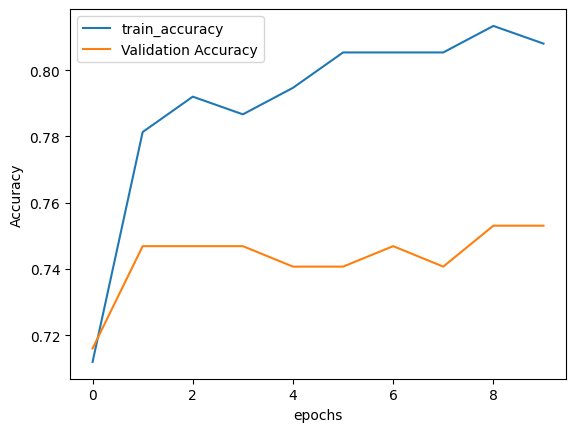

In [26]:
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()